In [1]:
import pandas as pd
import numpy as np
adult = pd.read_csv("/mnt/d/pvsc/data.sci/R-Course-HTML-Notes/R-Course-HTML-Notes/R-for-Data-Science-and-Machine-Learning/Training Exercises/Machine Learning Projects/CSV files for ML Projects/adult_sal.csv",na_values=['?'])

In [2]:
adult.head()

,Unnamed: 0,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA

In [3]:
adult.dropna(axis = 0,inplace=True)
adult.head()

,Unnamed: 0,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult.drop('Unnamed: 0',axis = 1,inplace=True)
adult.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot:>

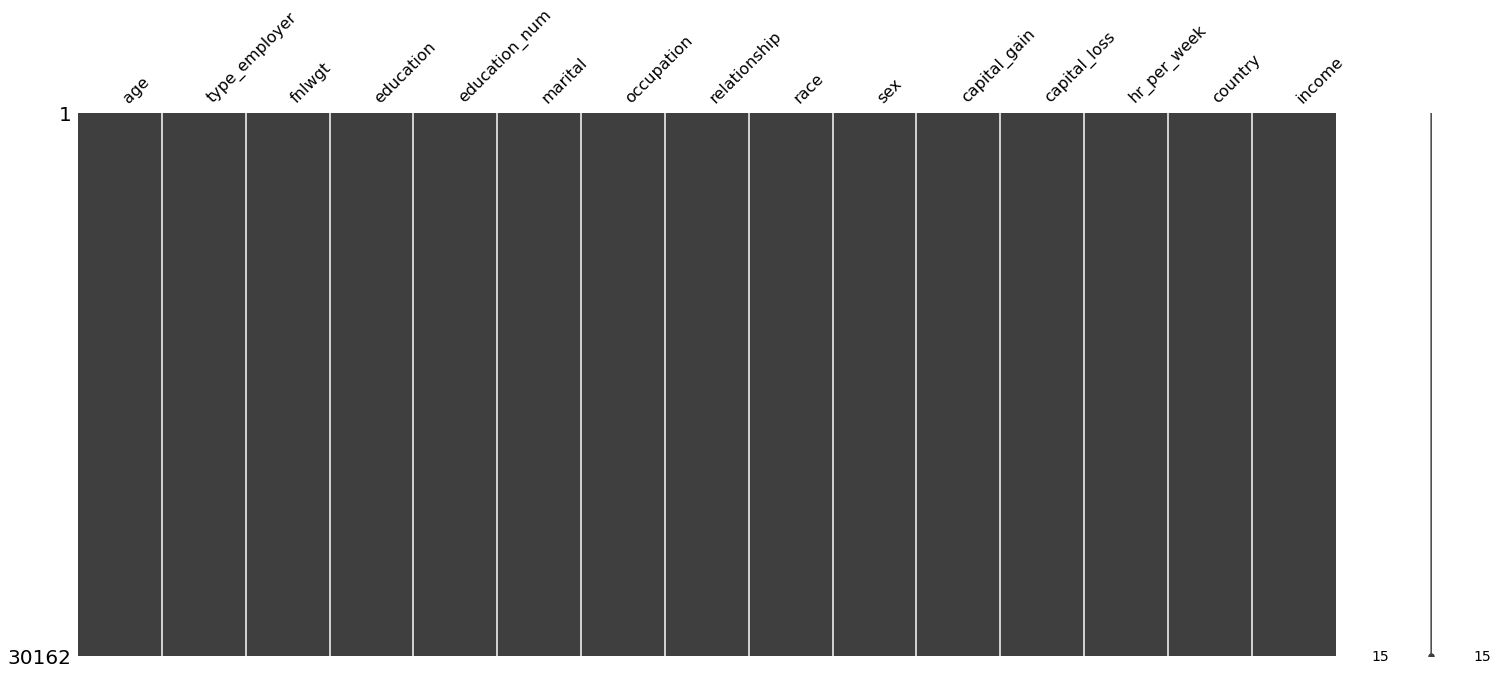

In [5]:
import missingno as ms
ms.matrix(adult)

In [6]:
pd.unique(adult['country'])

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [7]:
adult['country']=adult['country'].replace(['United-States', 'Cuba', 'Jamaica','Mexico','Cambodia','Columbia','Honduras','Guatemala','Canada','Peru','Haiti','El-Salvador','Laos','Puerto-Rico','Outlying-US(Guam-USVI-etc)','Nicaragua'],'North-America')
adult['country'] = adult['country'].replace(['India','Iran','Philippines','Thailand','Taiwan','China','Japan','Vietnam','Hong',],'Asia')
adult['country'] = adult['country'].replace(['England', 'Germany','Poland','Ecuador','Portugal', 'Dominican-Republic', 'France', 'Trinadad&Tobago', 'Ireland','Hungary', 'Holand-Netherlands', 'Greece', 'Italy', 'Yugoslavia', 'Scotland'],'Europe')
pd.unique(adult['country'])

array(['North-America', 'Asia', 'Europe', 'South'], dtype=object)

In [8]:
adult['type_employer'] = adult['type_employer'].replace(['State-gov', 'Federal-gov','Local-gov'],'gov')
adult['type_employer'] = adult['type_employer'].replace(['Private','Self-emp-inc'],'private')
adult['type_employer'] = adult['type_employer'].replace(['Without-pay','Self-emp-not-inc'],'Unemployed')
pd.unique(adult['type_employer'])

array(['gov', 'Unemployed', 'private'], dtype=object)

In [9]:
adult['marital']= adult['marital'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married')
adult['marital']= adult['marital'].replace(['Divorced','Widowed','Separated'],'Not-Married')
pd.unique(adult['marital'])

array(['Never-married', 'Married', 'Not-Married'], dtype=object)

In [10]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   type_employer  30162 non-null  object
 2   fnlwgt         30162 non-null  int64 
 3   education      30162 non-null  object
 4   education_num  30162 non-null  int64 
 5   marital        30162 non-null  object
 6   occupation     30162 non-null  object
 7   relationship   30162 non-null  object
 8   race           30162 non-null  object
 9   sex            30162 non-null  object
 10  capital_gain   30162 non-null  int64 
 11  capital_loss   30162 non-null  int64 
 12  hr_per_week    30162 non-null  int64 
 13  country        30162 non-null  object
 14  income         30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
adult[['age','type_employer','education_num','marital','occupation','race','sex','hr_per_week','country','income']]

,age,type_employer,education_num,marital,occupation,race,sex,hr_per_week,country,income
0,39,gov,13,Never-married,Adm-clerical,White,Male,40,North-America,<=50K
1,50,Unemployed,13,Married,Exec-managerial,White,Male,13,North-America,<=50K
2,38,private,9,Not-Married,Handlers-cleaners,White,Male,40,North-America,<=50K
3,53,private,7,Married,Handlers-cleaners,Black,Male,40,North-America,<=50K
4,28,private,13,Married,Prof-specialty,Black,Female,40,North-America,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,private,12,Married,Tech-support,White,Female,38,North-America,<=50K
32557,40,private,9,Married,Machine-op-inspct,White,Male,40,North-America,>50K
32558,58,private,9,Not-Married,Adm-clerical,White,Female,40,North-America,<=50K
32559,22,private,9,Never-married,Adm-clerical,White,Male,20,North-America,<=50K


In [12]:
import plotnine as plot

In [13]:
pd.unique(adult['race'])

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

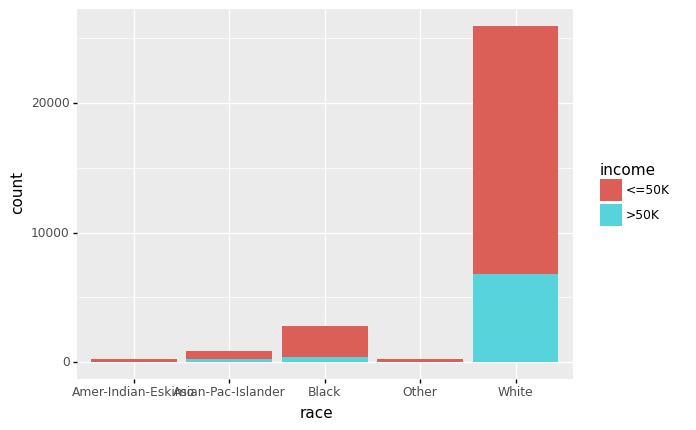

<ggplot: (8763198675429)>

In [27]:
plot.ggplot(data = adult)+plot.geom_bar(plot.aes(adult['race'],fill = adult['income']))

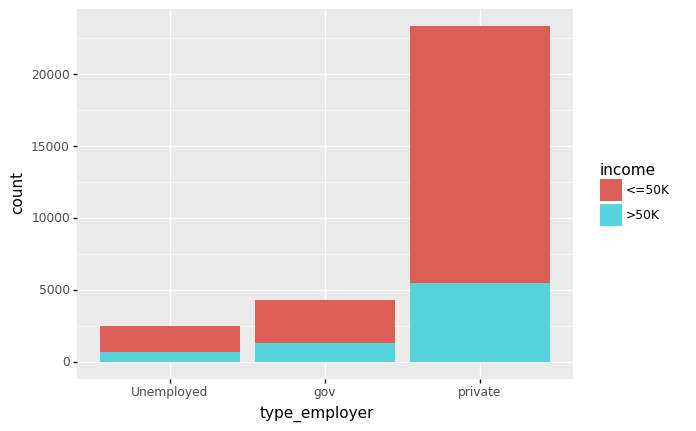

<ggplot: (8763197772270)>

In [16]:
plot.ggplot(data = adult)+plot.geom_bar(plot.aes(adult['type_employer'],fill = adult['income']))

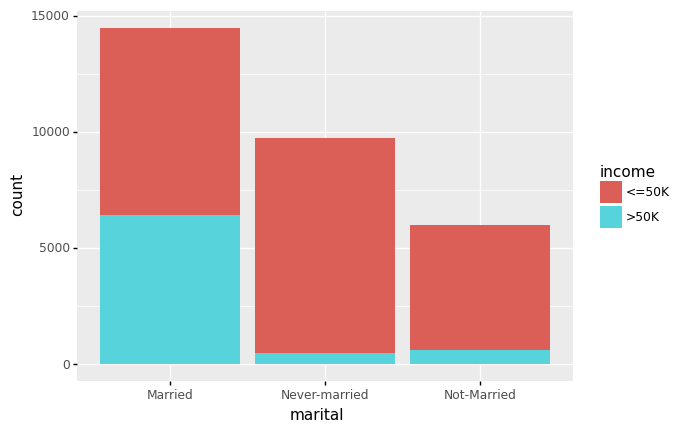

<ggplot: (8763197714213)>

In [17]:
plot.ggplot(data = adult)+plot.geom_bar(plot.aes(adult['marital'],fill = adult['income']))

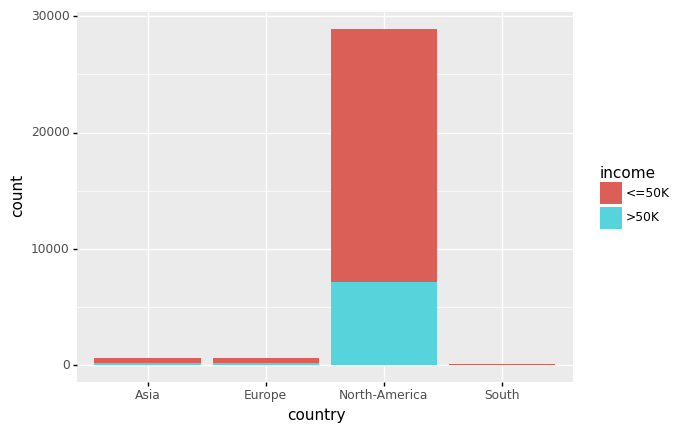

<ggplot: (8763197773198)>

In [26]:
plot.ggplot(data = adult)+plot.geom_bar(plot.aes(adult['country'],fill=adult['income']))

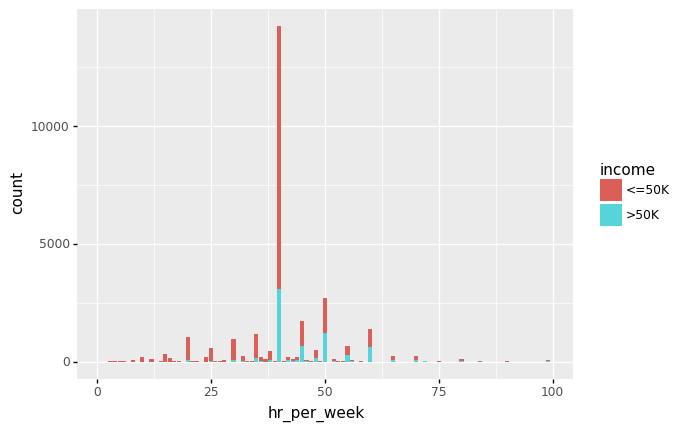

<ggplot: (8763196995127)>

In [25]:
plot.ggplot(data = adult)+plot.geom_bar(plot.aes(adult['hr_per_week'],fill=adult['income']))

In [ ]:
#factorizing
dataf = adult
subs = ['age','type_employer','education_num','marital','occupation','race','sex','hr_per_week','country','income']
for i in subs:
    dataf[i],_ = pd.factorize(dataf[i])
dataf.head()

In [ ]:
dataf = dataf[subs]
dataf.head()

In [ ]:
from sklearn.model_selection import train_test_split 
x = dataf[['age','type_employer','education_num','marital','occupation','race','sex','hr_per_week','country']]
y = dataf['income']
trainx,testx,trainy,testy = train_test_split(x,y,train_size=0.75)